<a href="https://colab.research.google.com/github/belhiibeng/dementia-classification/blob/main/Dementia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
train_data = pd.read_csv('/content/drive/MyDrive/Dementia Classification/oasis_longitudinal.csv', index_col='MRI ID')
test_data = pd.read_csv('/content/drive/MyDrive/Dementia Classification/oasis_cross-sectional.csv', index_col='ID')


In [ ]:
# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['CDR'], inplace=True)
test_data.dropna(axis=0, subset=['CDR'], inplace=True)
y = train_data.CDR.apply(str)
y_test = test_data.CDR.apply(str)
train_data.drop(['CDR'], axis=1, inplace=True)
test_data.drop(['CDR'], axis=1, inplace=True)

In [ ]:
# Select categorical columns with relatively low cardinality
categorical_cols = ['M/F']

In [ ]:
# Select numeric columns
numerical_cols = ['Age','Educ', 'SES', 'MMSE', 'eTIV', 'nWBV']

In [ ]:
# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X = train_data[my_cols].copy()
X_test = test_data[my_cols].copy()

In [ ]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler())
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Define the model
model = GradientBoostingClassifier(random_state=0)

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

In [ ]:
# Preprocessing of training data, fit model 
clf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Educ', 'SES', 'MMSE',
                                                   'eTIV', 'nWBV']),
                                                 ('cat', OneHotEncoder(),
                                                  ['M/F'])])),
                ('model', GradientBoostingClassifier(random_state=0))])

In [ ]:
# Preprocessing of test data, get predictions
predictions = clf.predict(X_test)

Confusion Matrix:


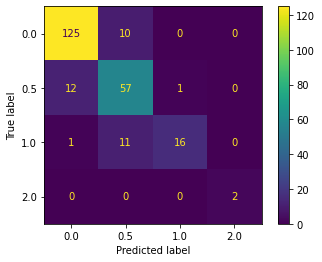


Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       135
         0.5       0.73      0.81      0.77        70
         1.0       0.94      0.57      0.71        28
         2.0       1.00      1.00      1.00         2

    accuracy                           0.85       235
   macro avg       0.89      0.83      0.85       235
weighted avg       0.86      0.85      0.85       235



In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
print("Confusion Matrix:")
plt.show()
clr = classification_report(y_test, predictions)
print("\nClassification Report:\n", clr)